# FIT5149 S2 2019 Assessment 1
## Predicting the Critical Temperature of a Superconductor


Student information
- Family Name: Kadyan
- Given Name: Reyash
- Student ID: 29895405
- Student email: rkad0004@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- dplyr
- reshape2
- ggplot2
- glmnet
- xgboost
- GGally
- praznik
- caret
- car

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

**Superconductivity** is a phenomenon of exactly zero electrical resistance and expulsion of magnetic flux fields occurring in certain materials, called superconductors, when cooled below a characteristic critical temperature. Superconductors are widely used in many industry fields, e.g. the Magnetic Resonance Imaging (MRI) in health care, electricity transportation in energy industry and magnetic separation, etc. 

Predicting the critical temperature (Tc) of a superconductor is still an open problem in the scientific community. In the past, simple empirical rules based on experiments have guided researchers in synthesizing superconducting materials for many years. Nowadays, features (or predictors) based on the superconductor’s elemental properties can be generated and used to predict Tc. In this project, we are going to analyze superconductor data from the Superconducting Material Database maintained by Japan’s National Institute for Materials Science (NIMS). The aim is to build statistical models that can predict Tc based on the material’s chemical properties.

Specifically, you are going to analyse a superconductor data set, which is based on real world material science data. 

### Importing libraries

In [1]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(glmnet)
library(xgboost)
library(GGally)
library(praznik)
library(caret)
library(car)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘xgboost’

The following object is masked from ‘package:dplyr’:

    slice


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: lattice
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



### Reading Data

In [2]:
conduct <- read.csv('train.csv')

Let's have a look at the data.

In [3]:
head(conduct)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,⋯,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,⋯,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,⋯,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,⋯,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,⋯,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,⋯,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,⋯,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [4]:
print(paste('Number of rows in data:',dim(conduct)[1]))
print(paste('Number of columns in data:',dim(conduct)[2]))

[1] "Number of rows in data: 21263"
[1] "Number of columns in data: 82"


In [5]:
print(paste('Structure of data is:\n\n'))
str(conduct)

[1] "Structure of data is:\n\n"
'data.frame':	21263 obs. of  82 variables:
 $ number_of_elements             : int  4 5 4 4 4 4 4 4 4 4 ...
 $ mean_atomic_mass               : num  88.9 92.7 88.9 88.9 88.9 ...
 $ wtd_mean_atomic_mass           : num  57.9 58.5 57.9 57.9 57.8 ...
 $ gmean_atomic_mass              : num  66.4 73.1 66.4 66.4 66.4 ...
 $ wtd_gmean_atomic_mass          : num  36.1 36.4 36.1 36.1 36.1 ...
 $ entropy_atomic_mass            : num  1.18 1.45 1.18 1.18 1.18 ...
 $ wtd_entropy_atomic_mass        : num  1.062 1.058 0.976 1.022 1.129 ...
 $ range_atomic_mass              : num  123 123 123 123 123 ...
 $ wtd_range_atomic_mass          : num  31.8 36.2 35.7 33.8 27.8 ...
 $ std_atomic_mass                : num  52 47.1 52 52 52 ...
 $ wtd_std_atomic_mass            : num  53.6 54 53.7 53.6 53.6 ...
 $ mean_fie                       : num  775 766 775 775 775 ...
 $ wtd_mean_fie                   : num  1010 1011 1011 1011 1010 ...
 $ gmean_fie                      :

### Splitting the data

Here, we will split the data based on 70:30 rule, which is 70% of the data for the training set and 30% for the test set. We will use `Random Sampling` method to make this split. This can be achieved by `sample()` function in base of R.

In [6]:
## 70% of the sample size
smp_size <- floor(0.70 * nrow(conduct))

## set the seed to make your partition reproducible
set.seed(1237)
train_ind <- sample(seq_len(nrow(conduct)), size = smp_size) # train indices generated by sampling

train <- conduct[train_ind, ]
test <- conduct[-train_ind, ]

Now, we will look at the distribution of both `training` and `test` set, to check for any sampling bias introduced while splitting the data. If both the distributions looks similar, we are good to go for our further analysis without introduction of any sampling bias from the `train-test split`.

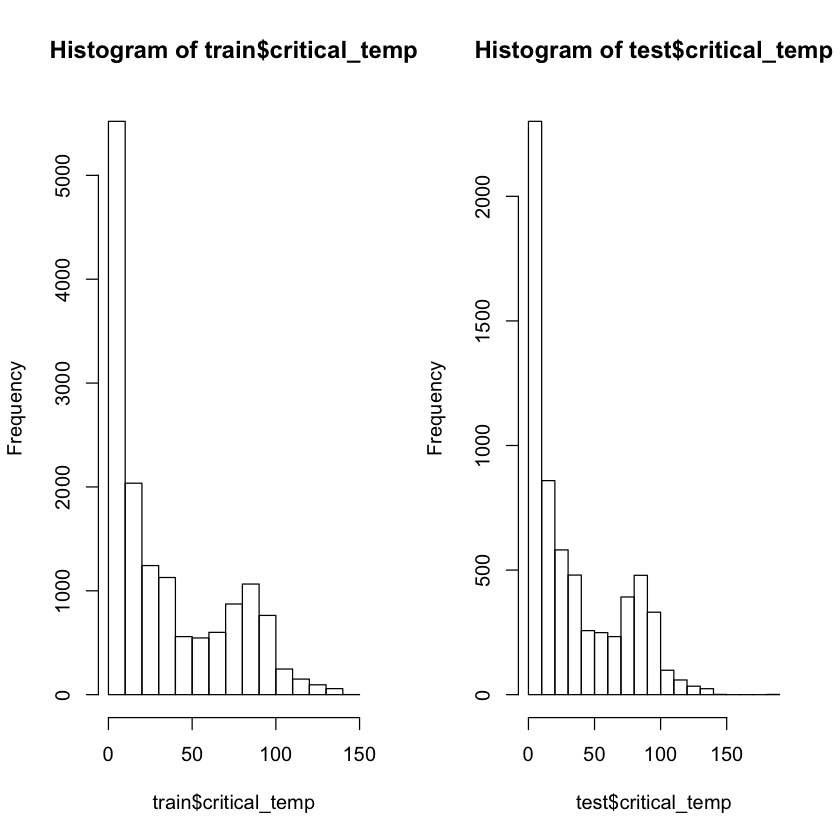

In [7]:
# checking distributions of both samples
par(mfrow=c(1,2))
hist(train$critical_temp)
hist(test$critical_temp)

In [8]:
# Splitting data from labels
# Training dataset
train.data <- train[,-82]
train.label <- train[,82]

# Testing dataset
test.data <- test[,-82]
test.label <- test[,82]

In [9]:
# Let's evaluate the correlation matrix
corr <- cor(train)

# Organising the matrix for pairwise correlation of features
corr.m <- data.frame('Var1'=rownames(corr)[row(corr)[upper.tri(corr)]], 
           'Var2'=colnames(corr)[col(corr)[upper.tri(corr)]], 
           'value'=corr[upper.tri(corr)])

# looking at the correlations
corr.m

Var1,Var2,value
number_of_elements,mean_atomic_mass,-0.13983969
number_of_elements,wtd_mean_atomic_mass,-0.35127311
mean_atomic_mass,wtd_mean_atomic_mass,0.81682544
number_of_elements,gmean_atomic_mass,-0.29039543
mean_atomic_mass,gmean_atomic_mass,0.94009473
wtd_mean_atomic_mass,gmean_atomic_mass,0.84841353
number_of_elements,wtd_gmean_atomic_mass,-0.45279942
mean_atomic_mass,wtd_gmean_atomic_mass,0.74761180
wtd_mean_atomic_mass,wtd_gmean_atomic_mass,0.96398655
gmean_atomic_mass,wtd_gmean_atomic_mass,0.85814357


## 2. Data Exploration<a class="anchor" id="sec_2"></a>

Let's look at the statistics of all variables.

In [10]:
summary(conduct)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

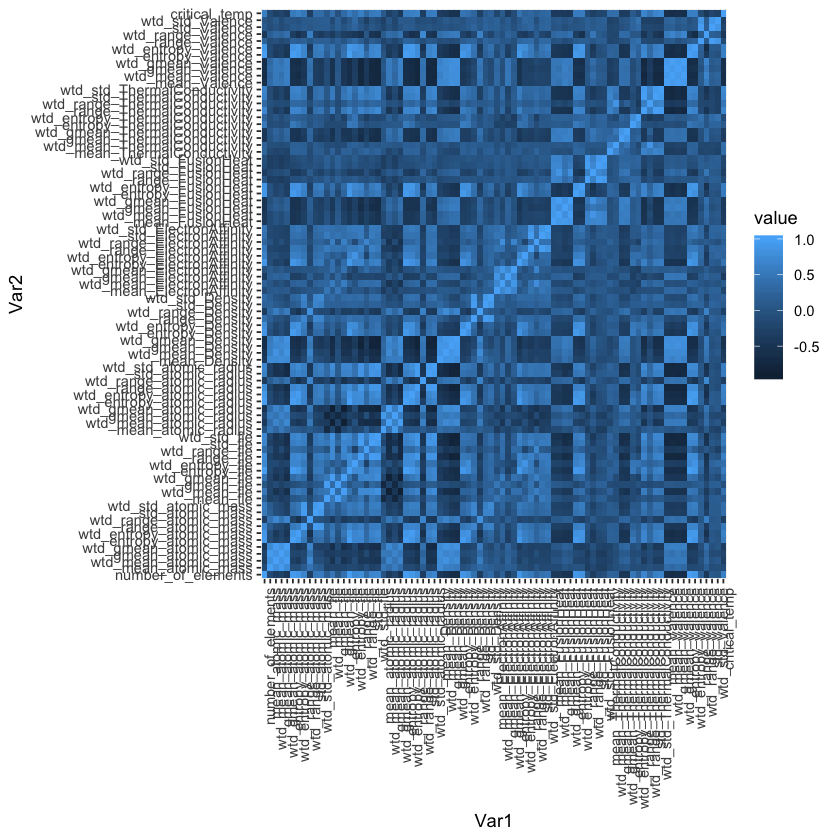

In [11]:
corr.melt <- melt(corr)
ggplot(data = corr.melt, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

Not much insights can be inferred from this plot, since there's so many features to visualise. We will devide the dataset, and visualise all the properties individually for the ease of perception.

In [12]:
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
  correlation <- cor(w, z)
 
  ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
  col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )
 
  ## square it to avoid visual bias due to "area vs diameter"
  radius <- sqrt(abs(correlation))
  radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
  x <- radius * cos(radians)
  y <- radius * sin(radians)
  ## make them full loops
  x <- c(x, tail(x,n=1))
  y <- c(y, tail(y,n=1))
 
  ## trick: "don't create a new plot" thing by following the
  ## advice here: http://www.r-bloggers.com/multiple-y-axis-in-a-r-plot/
  ## This allows
  par(new=TRUE)
  plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
  polygon(x, y, border=col, col=col)
}

# Following function accepts the start and end, and returns the sliced data based on those
filtered_data <- function(data, start, end){
    plot_data <- data[,c(names(data)[start:end],names(data)[82])]
    # setting names of columns for easy identification of characterstic of selected property.
    colnames(plot_data) <-  c('mean','wtd_mean','gmean','wtd_gmean','entropy','wtd_entropy','range','wtd_range','std','wtd_std','critical_temp')
    return(plot_data)
}


# filtering data for all properties
property1 <- filtered_data(conduct,2,11)
property2 <-filtered_data(conduct,12,21)
property3 <-filtered_data(conduct,22,31)
property4 <-filtered_data(conduct,32,41)
property5 <-filtered_data(conduct,42,51)
property6 <-filtered_data(conduct,52,61)
property7 <-filtered_data(conduct,62,71)
property8 <-filtered_data(conduct,72,81)

#### Atomic Mass

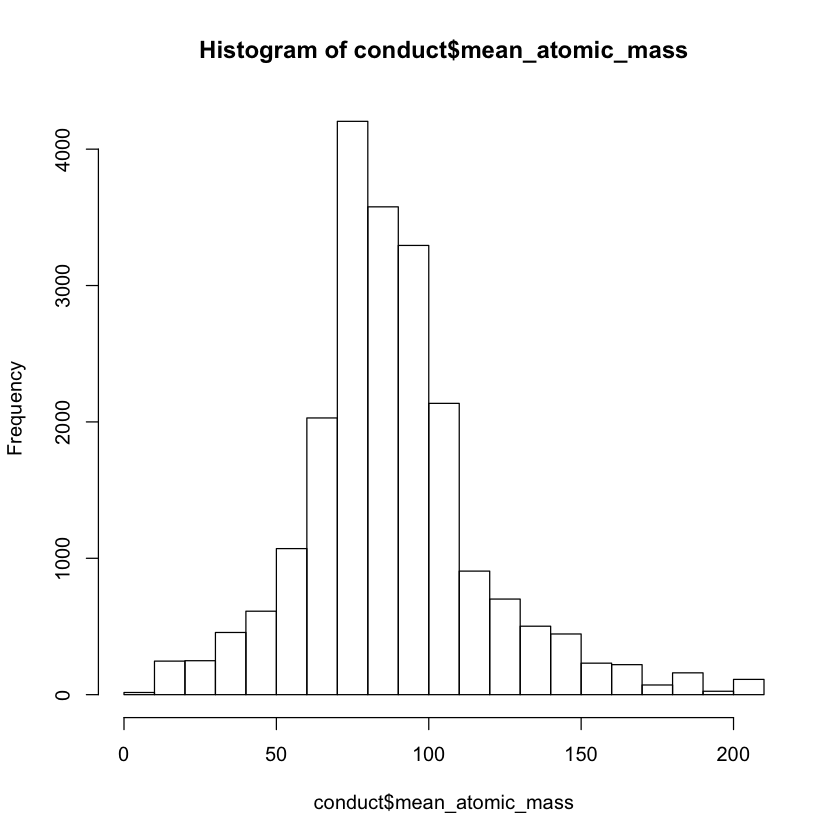

In [13]:
hist(conduct$mean_atomic_mass)

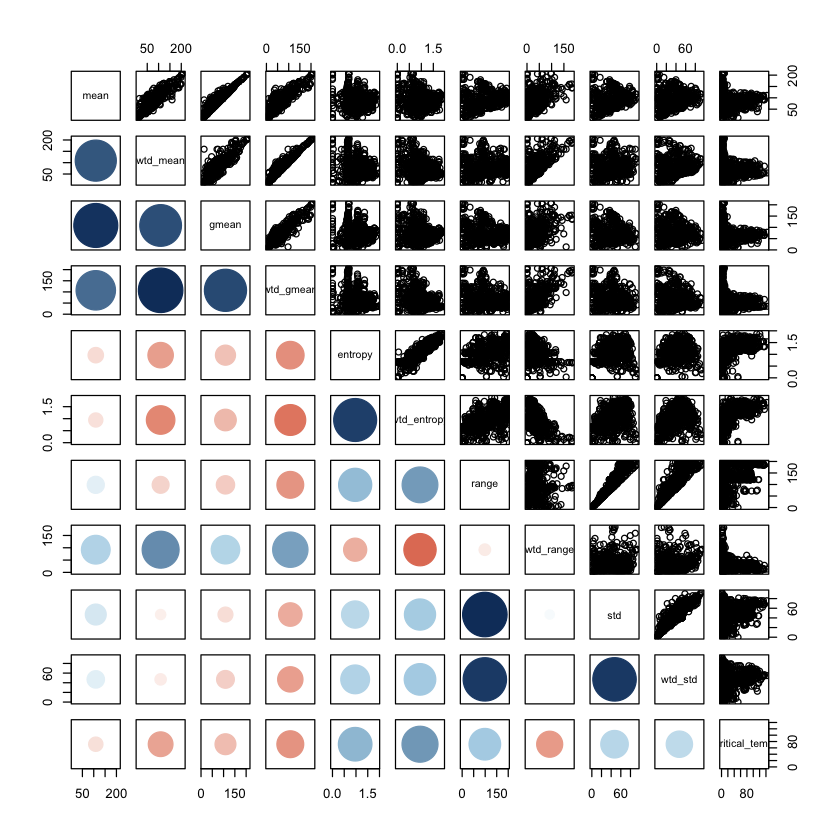

In [14]:
pairs(property1[sample.int(nrow(property1),1000),], lower.panel=panel.cor)

* The distribution of average values of atomic mass is normally distributed.
* `etropy` and `wtd_entropy` are highly positively corelated to `critical temperature`. 
* `wtd_mean` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### First Ionization Energy

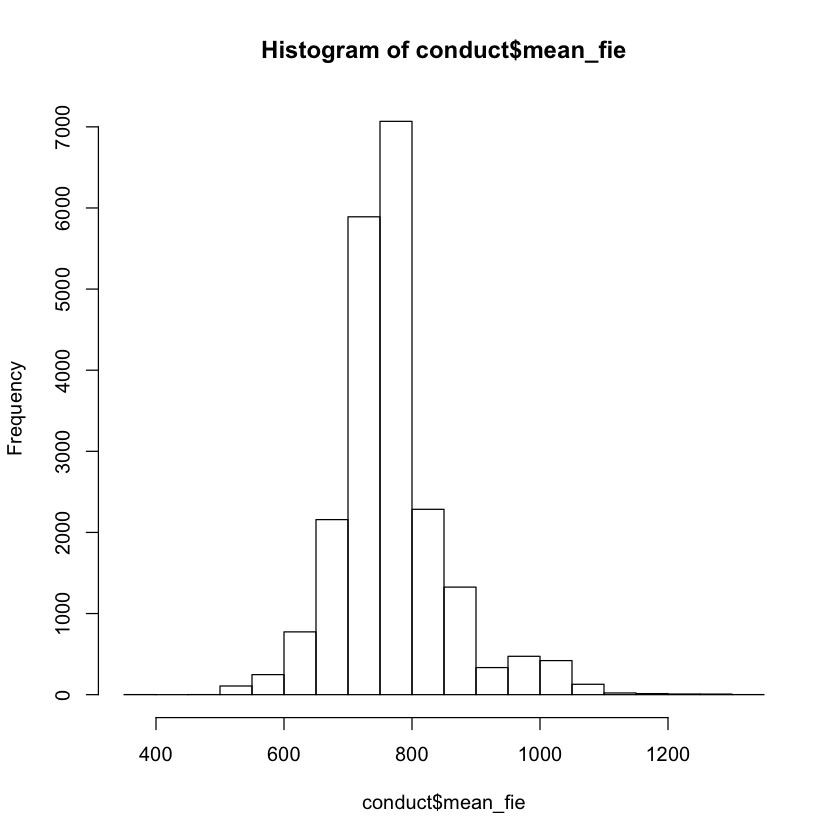

In [15]:
hist(conduct$mean_fie)

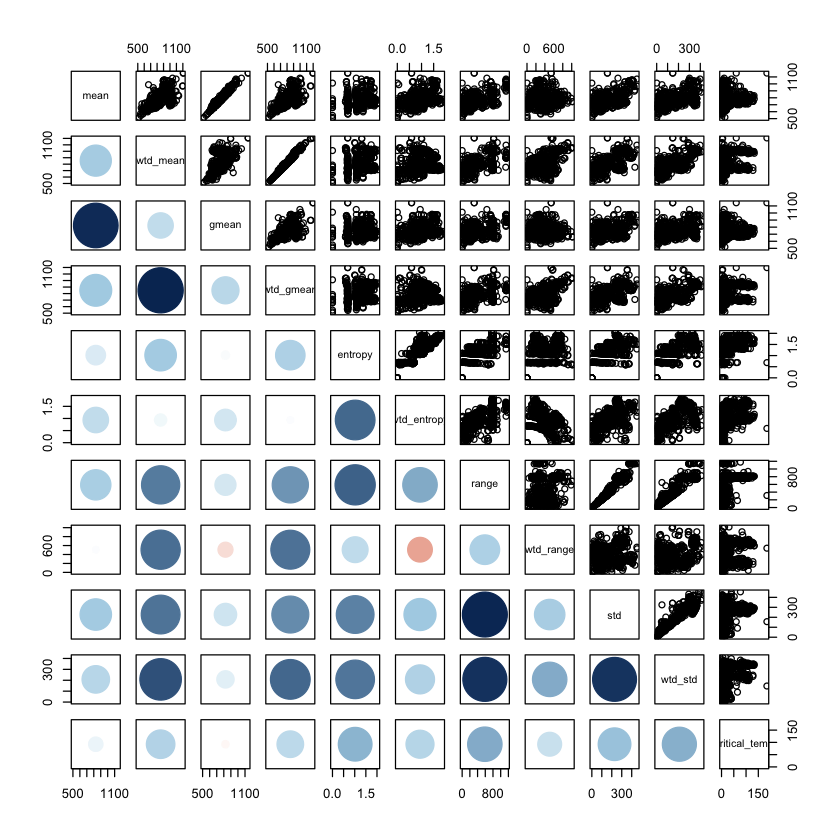

In [16]:
pairs(property2[sample.int(nrow(property2),1000),], lower.panel=panel.cor)

* The distribution of average values of First Ionization Energy is normally distributed.
* `etropy`, `wtd_std` and `range` high correlation with `critical temperature`. 
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Atomic Radius

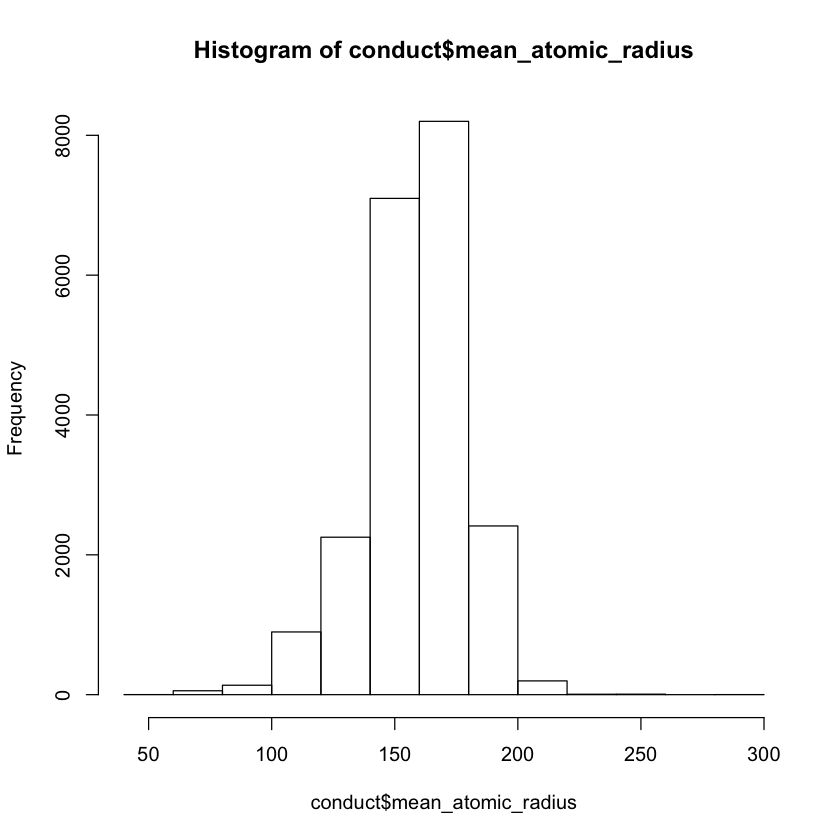

In [17]:
hist(conduct$mean_atomic_radius)

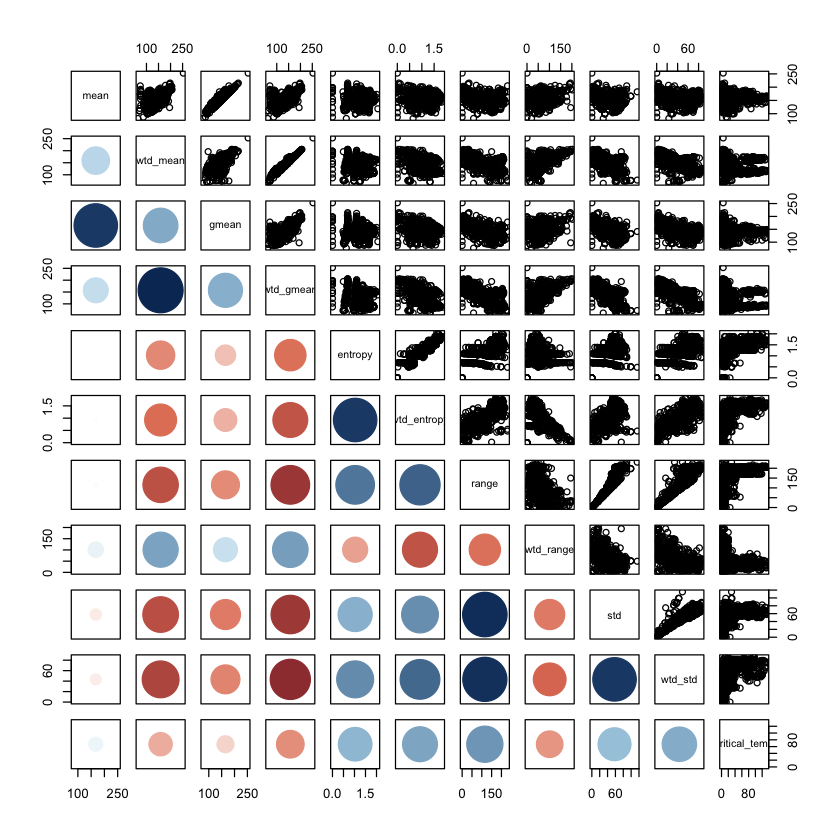

In [18]:
pairs(property3[sample.int(nrow(property3),1000),], lower.panel=panel.cor)

* The distribution of average values of atomic radius is left skewed.
* `range` is highly positively corelated to `critical temperature`. 
* `wtd_range` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Density

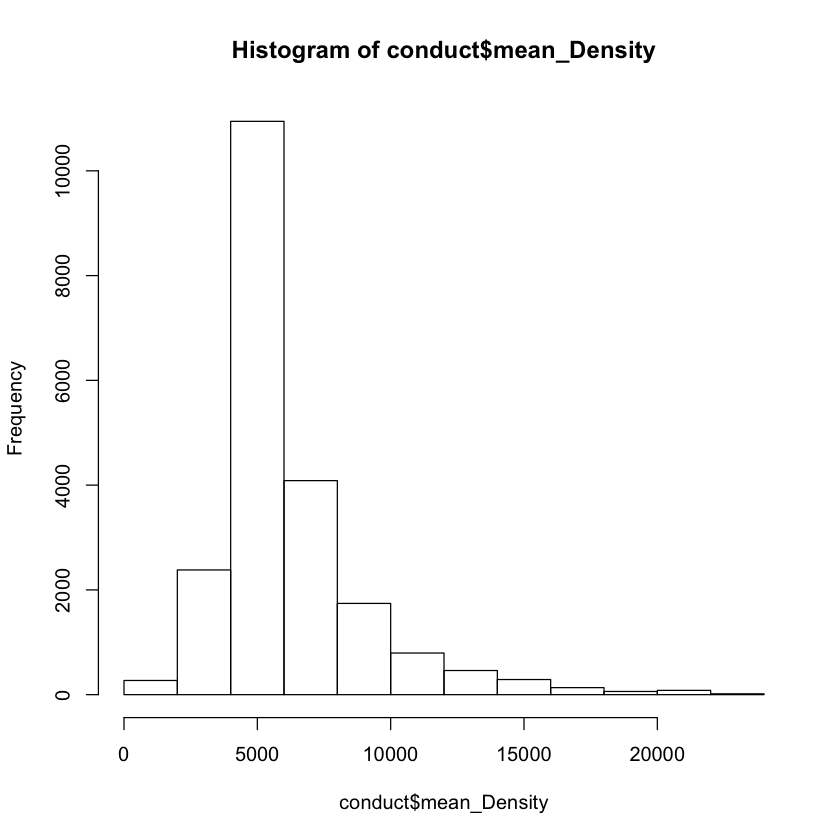

In [19]:
hist(conduct$mean_Density)

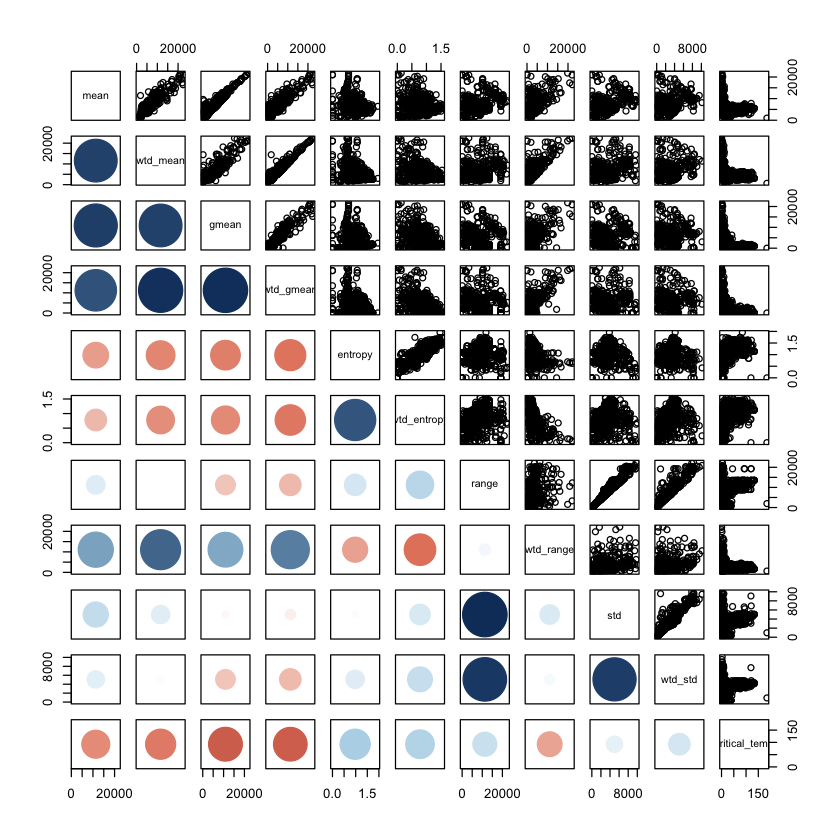

In [20]:
pairs(property4[sample.int(nrow(property4),1000),], lower.panel=panel.cor)

* The distribution of average values of Density is right skewed.
* `wtd_mean` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Electron Affinity

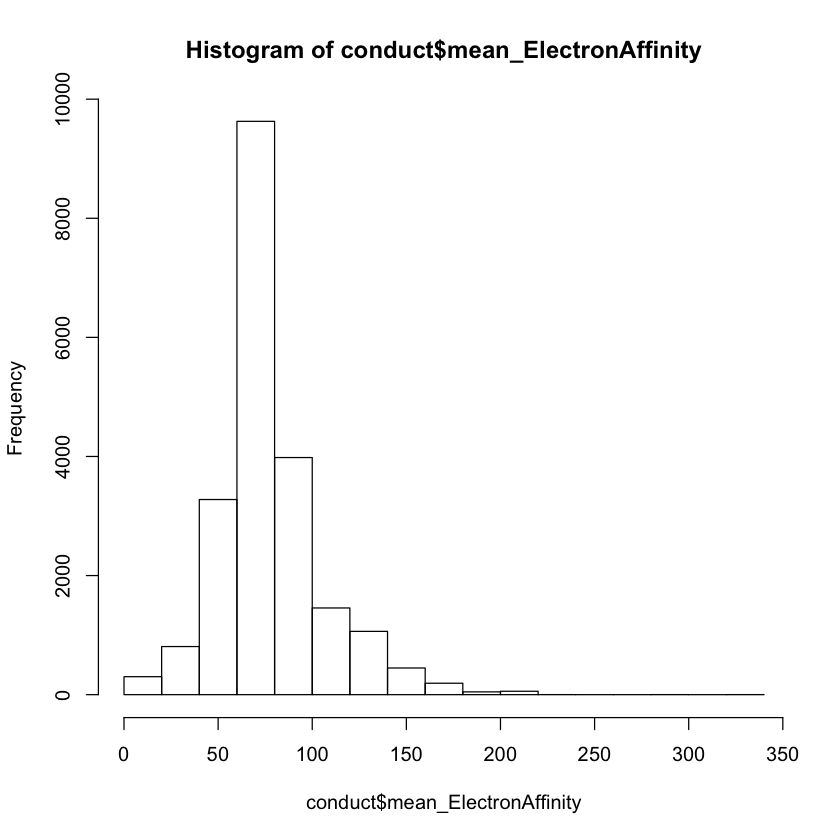

In [21]:
hist(conduct$mean_ElectronAffinity)

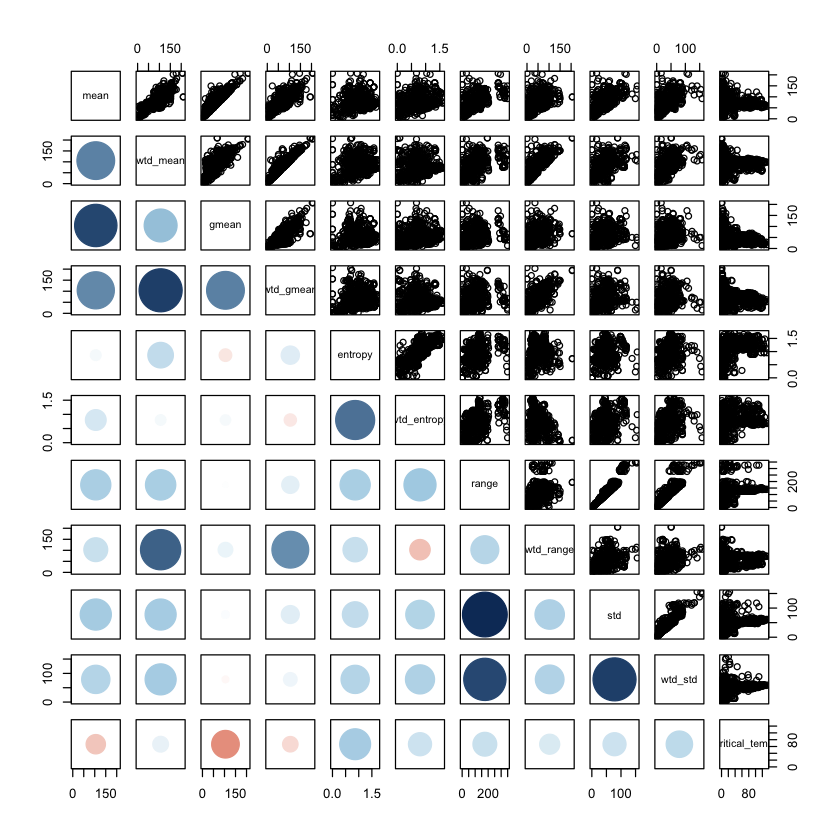

In [22]:
pairs(property5[sample.int(nrow(property5),1000),], lower.panel=panel.cor)

* The distribution of average values of Electron Affinity is normally distributed.
* `etropy`is positively corelated to `critical temperature`. 
* `gmean`is negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Fusion Heat

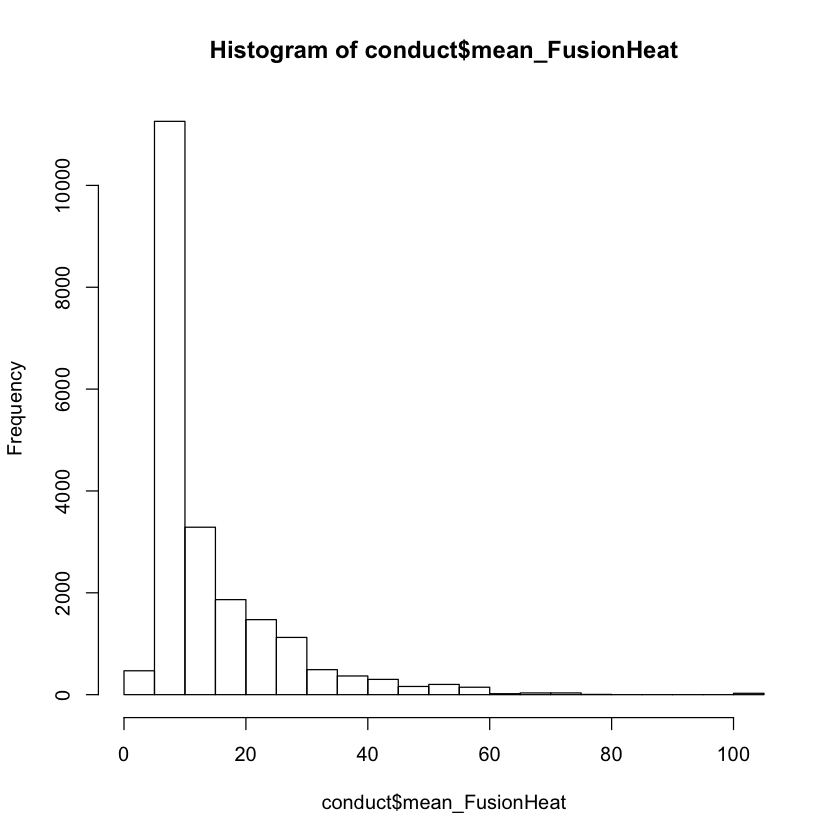

In [23]:
hist(conduct$mean_FusionHeat)

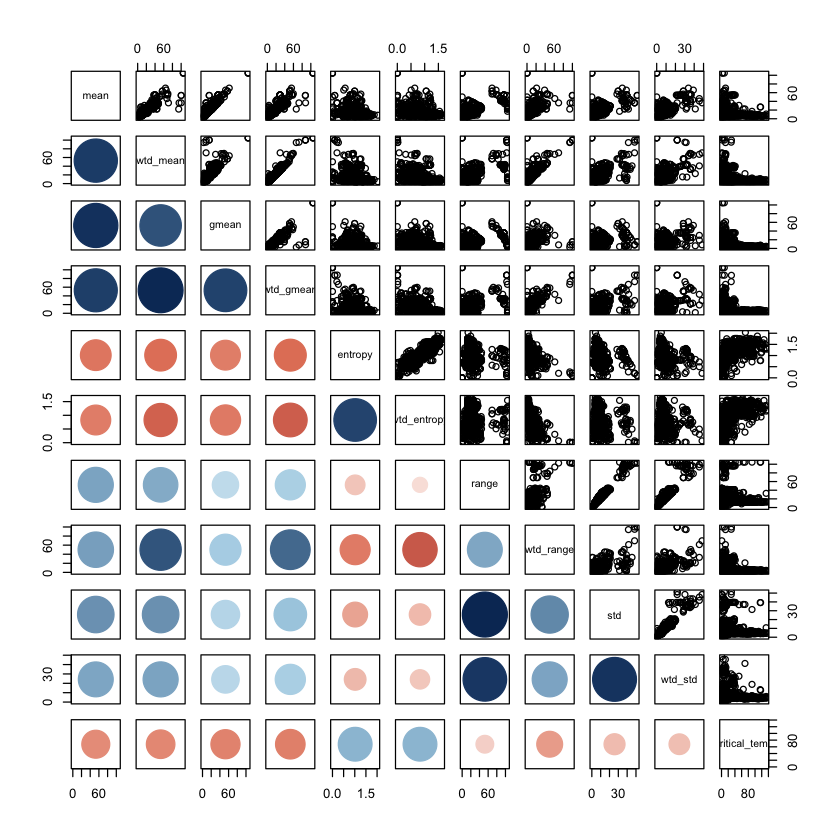

In [24]:
pairs(property6[sample.int(nrow(property6),1000),], lower.panel=panel.cor)

* The distribution of average values of `Fusion Heat` is right skewed.
* `etropy` and `wtd_entropy` are highly positively corelated to `critical temperature`. 
* `wtd_mean` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Thermal Conductivity

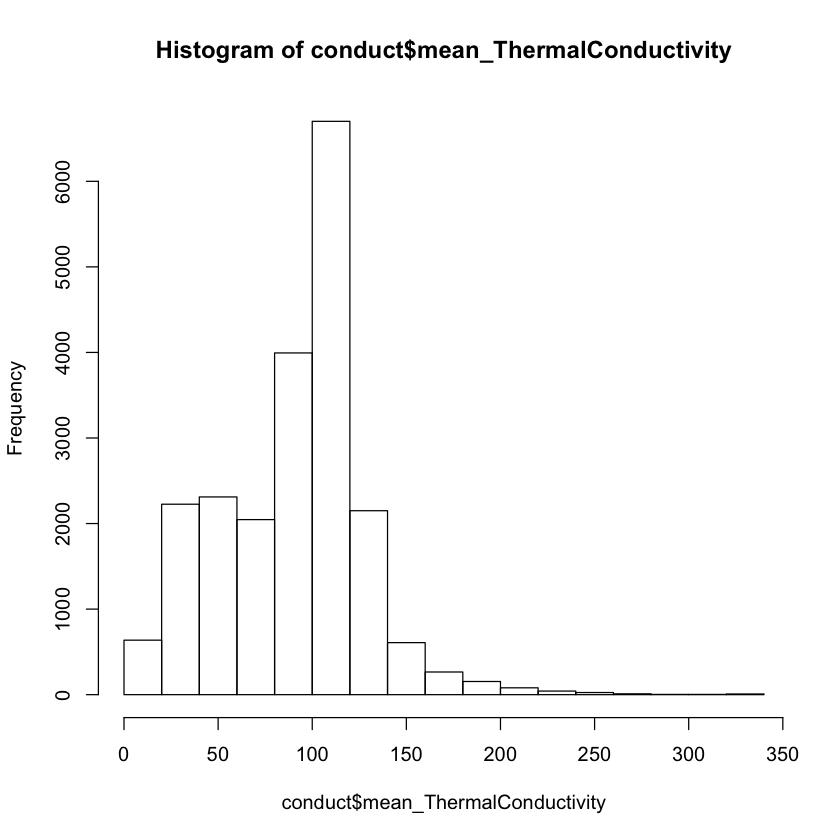

In [25]:
hist(conduct$mean_ThermalConductivity)

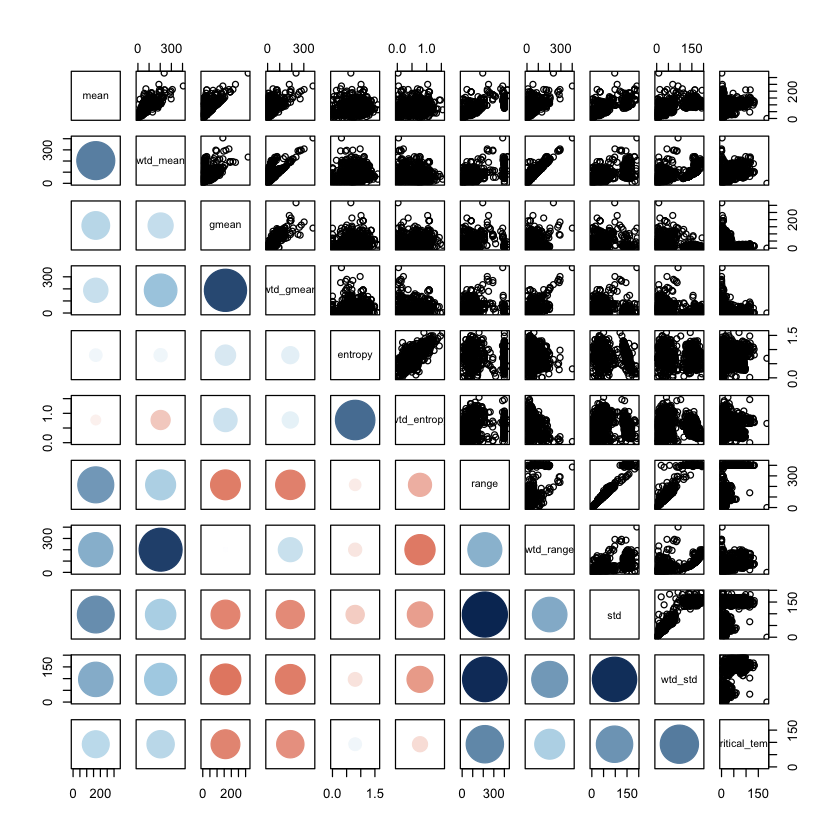

In [26]:
pairs(property7[sample.int(nrow(property7),1000),], lower.panel=panel.cor)

* The distribution of average values of `Thermal Conductivity` is normally distributed.
* `range`, `wtd_range` and `wtd_std` are highly positively corelated to `critical temperature`. 
* `gmean` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Valence

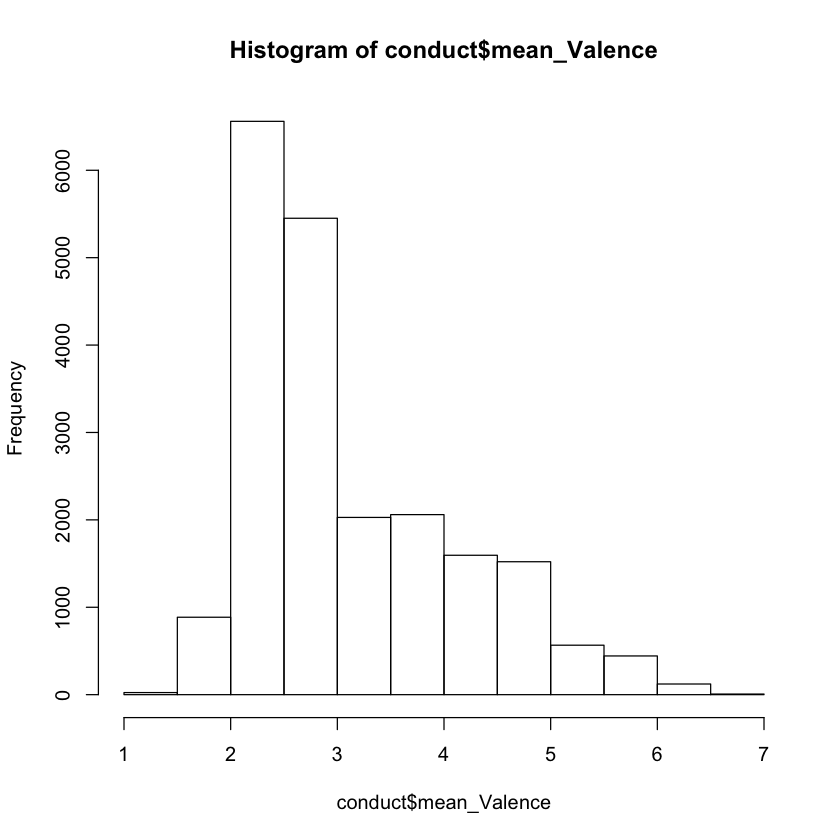

In [27]:
hist(conduct$mean_Valence)

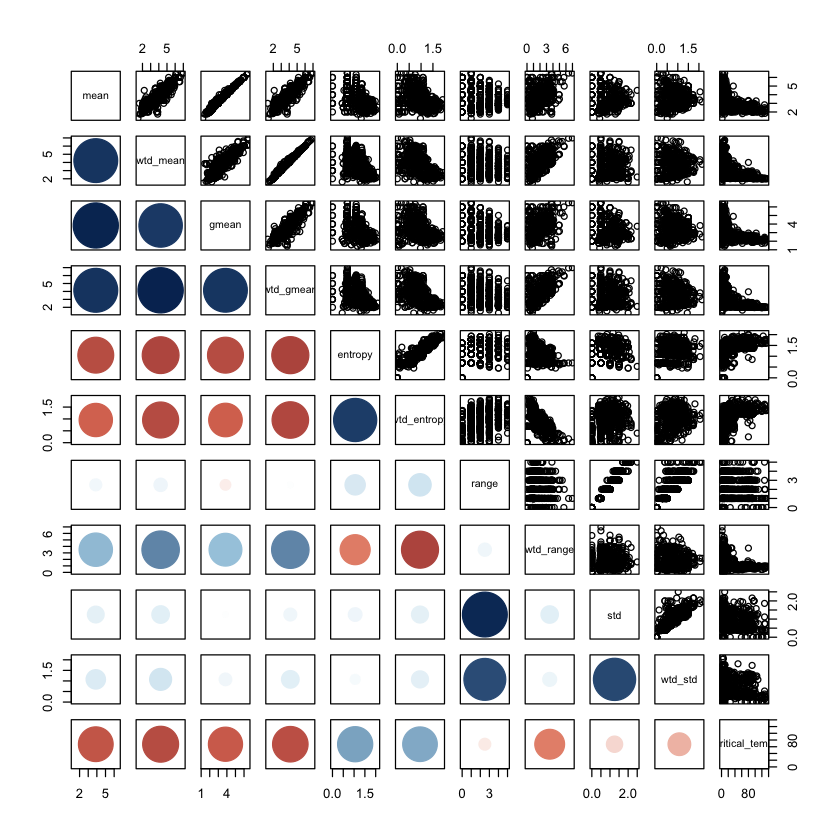

In [28]:
pairs(property8[sample.int(nrow(property8),1000),], lower.panel=panel.cor)

* The distribution of average values of atomic mass is normally distributed.
* `etropy` and `wtd_entropy` are positively corelated to `critical temperature`. 
* `mean`, `wtd_mean`,`gmean` and `wtd_gmean` are highly negatively correlated with the `critical temperature`.
* `entropy` and `wtd_entropy` shows some non-colinear relationship with `critical temperature`.

#### Observations

* It seems `entropy` and `wtd_entropy` of all features shows some non-colinear relationship with `critical temperature`.
* `mean`, `wtd_mean`,`gmean` and `wtd_gmean` columns of all features are highly correlated among themselves.

## 3. Model Development<a class="anchor" id="sec_3"></a>

Since there are multiple features in our dataset, we will try different feature selection techniques to reduce the complexity of our model, filter more important properties of elements, and increase the interpretibilty/explaining power of our model.

Following methods can be used for feature selection:
* **Filter** - Features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. We will be looking at following filter methods:
    - Pearson Correlation : Correlating the feature with the target. The features with the highest correlation are the selected.
    - MRMR(Minimum-redundancy-maximum-relevance): This feature selection method that can use either mutual information, correlation, or distance/similarity scores to select features. The aim is to penalise a feature's relevancy by its redundancy in the presence of the other selected features.
* **Wrapper** - Features are selected on the basis of information gain criteria, like AIC, BIC, AICc, etc. We will be looking at following shrinkage methods:
    - Hybrid Selection : Features are selected by combining both, 'forward' and 'backward' feature selection technique.
* **Shrinkage** - Relevant features are selected by shrinking the parameters for least important columns close to zero. We will be looking at following shrinkage methods:
    - Lasso - Absolute weight penalty term introduced in linear model.
    - Elastic Net - Absolute and squared weight penalty term introduced in linear model.

## Model-1 
### Lasso Regression on features selected by Correlation based Feature Selection(CFS) & MRMR Selection

####  Variance of features

Let's compute the variance of each feature. We will remove the features with variance lesser tham **10%**, since the values from these features would be very close and wouldn't contribute highly to the our model.

In [29]:
cols <- sort(apply(conduct, 2, var)) # evaluating variance and sorting in ascending order
cols[1:10] # observing 10 features with least variance
train.data.M1 <- train[cols>0.1] # filtering columns with variance higher than 10%

wtd_entropy_ElectronAffinity wtd_entropy_ThermalConductivity 
                     0.08178813                      0.10128204 
            wtd_entropy_Density     entropy_ThermalConductivity 
                     0.10224692                      0.10626051 
                wtd_entropy_fie                 entropy_Density 
                     0.11156773                      0.11720783 
       entropy_ElectronAffinity             entropy_atomic_mass 
                     0.11791747                      0.13317420 
         wtd_entropy_FusionHeat           entropy_atomic_radius 
                     0.13699232                      0.14093339

#### Observation

Only `wtd_entropy_ElectronAffinity` has variance of less than 10%. We will remove this feature from our analysis, since this  isn't statistically informative for our linear model. 

##### Correlation Based Feature Selection

In this section, we will filter out the features according to their correlation values with `critical_temp`. I have set the threshold to `0.5`, which selects even the columns with moderate correlations with `critical_temp`.

Additionally, we will ensure that the column with high variance doesn't pop up again in our analysis.

In [30]:
# Let's filter out features with moderate and high correlation with critical temperature
highly_correlated <- corr.m[((corr.m$Var2=='critical_temp')&(abs(corr.m$value) > 0.55)),'Var1']

print(paste('Number of features with correlation > 0.55 :',length(highly_correlated)))
print(paste("Is 'wtd_entropy_ElectronAffinity' in highly correlated features :",'wtd_entropy_ElectronAffinity' %in% highly_correlated))

# fetching names of features with high correlation to critical temperature
highly_correlated_features <- colnames(corr[,highly_correlated])
highly_correlated_features

[1] "Number of features with correlation > 0.55 : 21"
[1] "Is 'wtd_entropy_ElectronAffinity' in highly correlated features : FALSE"


[1] "wtd_gmean_atomic_radius"       "mean_ElectronAffinity"        
 [3] "wtd_gmean_atomic_mass"         "std_atomic_radius"            
 [5] "range_Valence"                 "mean_atomic_mass"             
 [7] "wtd_mean_ElectronAffinity"     "wtd_entropy_atomic_radius"    
 [9] "wtd_gmean_Density"             "wtd_gmean_Valence"            
[11] "entropy_atomic_mass"           "wtd_entropy_ElectronAffinity" 
[13] "mean_Density"                  "std_Density"                  
[15] "std_Valence"                   "gmean_atomic_radius"          
[17] "wtd_gmean_ThermalConductivity" "entropy_fie"                  
[19] "wtd_entropy_FusionHeat"        "range_atomic_mass"            
[21] "wtd_range_ElectronAffinity"

Now, we will try to select the good features using **MRMR(Maximum Relevance and Minimum Redundancy)** technique. We will use `MRMR` function of `praznik` library, which inputs the data, labels and k, which is the number of features you want to select. I have used top 20 features with highest gain score. 

In [31]:
# selcting top 20 features with highest gain score
mrmr_features <- MRMR(train.data,train.label,k=20)
data.frame(mrmr_features$score) -> mrmr_features # converting into dataframe
names(mrmr_features) <- 'score' # renaming score column
mrmr_select_feature <- row.names(mrmr_features) # extracting names of 20 features with highest gain score
mrmr_select_feature

[1] "range_atomic_radius"           "wtd_range_ThermalConductivity"
 [3] "gmean_ElectronAffinity"        "wtd_entropy_atomic_mass"      
 [5] "gmean_Valence"                 "mean_ThermalConductivity"     
 [7] "gmean_Density"                 "wtd_range_FusionHeat"         
 [9] "wtd_std_ThermalConductivity"   "std_Density"                  
[11] "wtd_entropy_Valence"           "wtd_mean_Valence"             
[13] "gmean_FusionHeat"              "wtd_gmean_ElectronAffinity"   
[15] "std_ElectronAffinity"          "wtd_range_atomic_mass"        
[17] "range_ThermalConductivity"     "entropy_Density"              
[19] "wtd_gmean_Density"             "mean_Valence"

Now, in this analysis we will take `union` of the two set of features obtained above by two feature selection techniques, i.e. **CFS** and **MRMR**.

In [32]:
# union of two sets of important features 
union_features <- union(highly_correlated_features,mrmr_select_feature)
print(paste('Number of features after union:',length(union_features)))

# Filter the data with relevant features
train.data.M1 <- train[,c(union_features,'critical_temp')]
head(train.data.M1)

[1] "Number of features after union: 39"


,wtd_gmean_atomic_radius,mean_ElectronAffinity,wtd_gmean_atomic_mass,std_atomic_radius,range_Valence,mean_atomic_mass,wtd_mean_ElectronAffinity,wtd_entropy_atomic_radius,wtd_gmean_Density,wtd_gmean_Valence,⋯,wtd_entropy_Valence,wtd_mean_Valence,gmean_FusionHeat,wtd_gmean_ElectronAffinity,std_ElectronAffinity,wtd_range_atomic_mass,range_ThermalConductivity,entropy_Density,mean_Valence,critical_temp
6979,85.95450,69.500,36.71000,64.61166,3,92.85524,107.48315,1.669246,62.04894,2.295386,⋯,1.436027,2.443980,4.962966,74.45692,53.23520,25.71912,399.97342,1.433510,2.833333,57.00
20920,109.99415,72.240,45.77052,50.20120,3,63.32905,70.68750,1.370059,622.00587,3.080070,⋯,1.494825,3.250000,3.212525,54.64780,41.31768,31.91681,78.97342,1.287136,3.600000,11.67
516,154.69254,88.570,74.63370,71.84261,1,88.56496,83.46857,1.204057,1969.09055,2.119268,⋯,1.343432,2.142857,6.028637,60.62865,47.39670,38.81705,399.97342,1.329820,2.200000,87.80
2515,90.57659,56.625,35.75816,67.64963,1,86.27073,110.38831,1.585447,78.53133,2.053357,⋯,1.331861,2.064935,4.800563,85.10029,55.36618,15.46447,399.97342,1.438219,2.166667,85.00
4167,89.71546,65.230,34.91444,69.42449,1,72.32465,108.69523,1.370040,66.30262,2.067227,⋯,1.232428,2.081538,5.160593,85.76728,54.60631,20.86948,399.97342,1.318042,2.400000,73.00
16987,87.87166,91.350,35.55512,72.29583,2,90.14226,113.98432,1.090112,50.87849,2.426279,⋯,1.077933,2.557491,3.241224,104.75019,40.64317,33.40233,399.97342,1.088928,3.000000,16.25


Let's fit a `linear` model and check the performance of the model! `lm()` function is used to fit a linear model to all the features selected above.

In [33]:
# fitting a linear model
fit.prelim <- lm(critical_temp~mean_Valence + entropy_Density + range_ThermalConductivity + wtd_range_atomic_mass + std_ElectronAffinity + wtd_gmean_ElectronAffinity + gmean_FusionHeat + wtd_mean_Valence + wtd_entropy_Valence + wtd_std_ThermalConductivity + wtd_range_FusionHeat + gmean_Density + mean_ThermalConductivity + gmean_Valence + wtd_entropy_atomic_mass + gmean_ElectronAffinity + wtd_range_ThermalConductivity + range_atomic_radius + wtd_range_ElectronAffinity + range_atomic_mass + wtd_entropy_FusionHeat + entropy_fie + wtd_gmean_ThermalConductivity + gmean_atomic_radius + std_Valence + std_Density + mean_Density + wtd_entropy_ElectronAffinity + entropy_atomic_mass + wtd_gmean_Valence + wtd_gmean_Density + wtd_entropy_atomic_radius + wtd_mean_ElectronAffinity + mean_atomic_mass + range_Valence + std_atomic_radius + wtd_gmean_atomic_mass + mean_ElectronAffinity + wtd_gmean_atomic_radius,
                 data=train)
summary(fit.prelim) # summary of model


Call:
lm(formula = critical_temp ~ mean_Valence + entropy_Density + 
    range_ThermalConductivity + wtd_range_atomic_mass + std_ElectronAffinity + 
    wtd_gmean_ElectronAffinity + gmean_FusionHeat + wtd_mean_Valence + 
    wtd_entropy_Valence + wtd_std_ThermalConductivity + wtd_range_FusionHeat + 
    gmean_Density + mean_ThermalConductivity + gmean_Valence + 
    wtd_entropy_atomic_mass + gmean_ElectronAffinity + wtd_range_ThermalConductivity + 
    range_atomic_radius + wtd_range_ElectronAffinity + range_atomic_mass + 
    wtd_entropy_FusionHeat + entropy_fie + wtd_gmean_ThermalConductivity + 
    gmean_atomic_radius + std_Valence + std_Density + mean_Density + 
    wtd_entropy_ElectronAffinity + entropy_atomic_mass + wtd_gmean_Valence + 
    wtd_gmean_Density + wtd_entropy_atomic_radius + wtd_mean_ElectronAffinity + 
    mean_atomic_mass + range_Valence + std_atomic_radius + wtd_gmean_atomic_mass + 
    mean_ElectronAffinity + wtd_gmean_atomic_radius, data = train)

Residuals:
  

Now, we will check the **Variance Inflation Factor (VIF)** of all features, which is the quotient of the variance in a model with multiple terms by the variance of a model with one term alone. It is used to filter out the features with high `multicoliinearity` in an ordinary least squares regression analysis. It provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.
Usually, features with higher **VIF** are removed from our analysis.

In [34]:
# VIF of all features
sort(vif(fit.prelim)) 

wtd_range_FusionHeat              gmean_FusionHeat 
                     3.632848                      4.613062 
                  std_Density         wtd_range_atomic_mass 
                     5.664400                      6.157139 
     mean_ThermalConductivity wtd_range_ThermalConductivity 
                     9.732066                      9.751431 
         std_ElectronAffinity             range_atomic_mass 
                    10.001311                     11.104446 
wtd_gmean_ThermalConductivity           gmean_atomic_radius 
                    11.595479                     12.644661 
   wtd_range_ElectronAffinity  wtd_entropy_ElectronAffinity 
                    12.883703                     14.372612 
       wtd_entropy_FusionHeat              mean_atomic_mass 
                    14.583417                     20.634826 
              entropy_Density       wtd_gmean_atomic_radius 
                    23.834390                     26.127621 
                 mean_Density         wtd_gmean_atomic_mass 
                    32.064027                     32.257423 
    range_ThermalConductivity        gmean_ElectronAffinity 
                    37.310076                     39.427722 
                  std_Valence                 range_Valence 
                    41.446529                     41.560269 
            wtd_gmean_Density    wtd_gmean_ElectronAffinity 
                    41.780393                     42.423241 
      wtd_entropy_atomic_mass   wtd_std_ThermalConductivity 
                    46.902826                     50.027495 
            std_atomic_radius         mean_ElectronAffinity 
                    56.105009                     58.369532 
    wtd_mean_ElectronAffinity                 gmean_Density 
                    62.421781                     64.850937 
          entropy_atomic_mass           range_atomic_radius 
                    80.755087                     84.345633 
          wtd_entropy_Valence                   entropy_fie 
                    88.971693                     96.050160 
    wtd_entropy_atomic_radius                 gmean_Valence 
                   144.399839                    676.598216 
                 mean_Valence             wtd_gmean_Valence 
                   756.034118                    757.647868 
             wtd_mean_Valence 
                   852.903500

Some features has significantly high VIF, this indicates high collinearity of those features. Since, VIF is measure of multicollinearity, this means features with 3-digits of VIF are highly collinear with some other features. We should remove these features from our analysis.

In [35]:
# features with high VIF measure
high_vif <- c('wtd_entropy_atomic_radius','gmean_Valence','mean_Valence','wtd_gmean_Valence','wtd_mean_Valence')

# filtering out features that are not in above list of features with high VIF
vif_features <- union_features[!(union_features %in% high_vif)]
train.data.M1 <- train[,c(vif_features,'critical_temp')] # new filtered training dataset

fit.vif <- lm(critical_temp~.,data=train.data.M1) # fitting a model the selected features
summary(fit.vif) # summary


Call:
lm(formula = critical_temp ~ ., data = train.data.M1)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.397 -11.122   0.476  11.593 115.975 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    3.345e+00  2.886e+00   1.159   0.2463    
wtd_gmean_atomic_radius        2.290e-01  1.649e-02  13.886  < 2e-16 ***
mean_ElectronAffinity          9.849e-02  4.238e-02   2.324   0.0201 *  
wtd_gmean_atomic_mass         -1.680e-02  2.385e-02  -0.704   0.4812    
std_atomic_radius             -8.799e-01  5.159e-02 -17.057  < 2e-16 ***
range_Valence                  4.643e+00  8.081e-01   5.745 9.35e-09 ***
mean_atomic_mass               4.419e-02  2.341e-02   1.888   0.0591 .  
wtd_mean_ElectronAffinity      2.249e-02  3.627e-02   0.620   0.5352    
wtd_gmean_Density              1.698e-03  2.479e-04   6.847 7.83e-12 ***
entropy_atomic_mass           -2.591e+01  3.785e+00  -6.845 7.95e-12 ***
wtd_entropy_ElectronAffinit

It is evident from the R-squared values of the `fit.prelim`, which is 0.6899, and `fit.vif` (linear model after removing features with high VIF), which is 0.6827, that those features were multicollinear. R-squared value changed in third decimal place, which indicates the fit of our linear model isn't affected much after removing those features.
Upon further inspection of the model, we can see that there are few features that have high `p-value`.
Those feature selected by techniques used above, are not statistically significant. `p-value` in the stats above, indicates the probability of the test statistic at least as unusual as the one we obtained, if the null hypothesis were true. In this case, the null hypothesis is that the true coefficient is zero; if that probability is low, it's suggesting that it would be rare to get a result as unusual as this if the coefficient were really zero. However, the features with comparatively higher p-value, aren't statistically useful and can be removed from our analysis.

To remove the features with lower statistical significance (possibly features with p-values close to 0), we will use **`Wrapper`** method of feature selection. Wrapper methods are based on greedy search algorithms, as they evaluate all possible combinations of the features and select the combination that produces the best result for a specific machine learning algorithm, using some information gain criteria. By default it uses `Akaike Information Criteria (AIC)`, and continues iteration until the AIC stops reducing with the change of features. This can be achived by using `step()` function in R. We will use `Hybrid feature selection` algorithm by setting the argument `direction = 'both'` in step() funcition.

In [36]:
# Hybrid feature selection
fit.step <- step(fit.vif,direction='both')
summary(fit.step)

Start:  AIC=88185.89
critical_temp ~ wtd_gmean_atomic_radius + mean_ElectronAffinity + 
    wtd_gmean_atomic_mass + std_atomic_radius + range_Valence + 
    mean_atomic_mass + wtd_mean_ElectronAffinity + wtd_gmean_Density + 
    entropy_atomic_mass + wtd_entropy_ElectronAffinity + mean_Density + 
    std_Density + std_Valence + gmean_atomic_radius + wtd_gmean_ThermalConductivity + 
    entropy_fie + wtd_entropy_FusionHeat + range_atomic_mass + 
    wtd_range_ElectronAffinity + range_atomic_radius + wtd_range_ThermalConductivity + 
    gmean_ElectronAffinity + wtd_entropy_atomic_mass + mean_ThermalConductivity + 
    gmean_Density + wtd_range_FusionHeat + wtd_std_ThermalConductivity + 
    wtd_entropy_Valence + gmean_FusionHeat + wtd_gmean_ElectronAffinity + 
    std_ElectronAffinity + wtd_range_atomic_mass + range_ThermalConductivity + 
    entropy_Density

                                Df Sum of Sq     RSS   AIC
- gmean_ElectronAffinity         1         5 5543952 88184
- std_Electr


Call:
lm(formula = critical_temp ~ wtd_gmean_atomic_radius + mean_ElectronAffinity + 
    std_atomic_radius + range_Valence + mean_atomic_mass + wtd_gmean_Density + 
    entropy_atomic_mass + wtd_entropy_ElectronAffinity + std_Density + 
    std_Valence + gmean_atomic_radius + wtd_gmean_ThermalConductivity + 
    entropy_fie + wtd_entropy_FusionHeat + range_atomic_mass + 
    wtd_range_ElectronAffinity + range_atomic_radius + wtd_range_ThermalConductivity + 
    wtd_entropy_atomic_mass + mean_ThermalConductivity + gmean_Density + 
    wtd_range_FusionHeat + wtd_std_ThermalConductivity + wtd_entropy_Valence + 
    wtd_gmean_ElectronAffinity + wtd_range_atomic_mass + range_ThermalConductivity + 
    entropy_Density, data = train.data.M1)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.171 -11.114   0.459  11.578 115.660 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.476e+00  2.637e+00   0.939  0.34784   

In [37]:
# saving the names of features of model 1
model_1_features <- names(fit.step$coefficients)[-1]

Looking at the model above, we can see that all the staistical non-significant columns are removed, without changing R-squared value at all. `28` features are selected in the final model.
Now, we will check the performance of this model on our test set as follows.

In [38]:
# making predictions using fitted model above
test_pred <- predict(fit.step,newdata=test.data)
# Checking MSE
mse_model_1 <- sqrt(mean((test.label - test_pred)^2))
print(paste('RMSE for Model 1:',mse_model_1))

# Checking R-Squared Value
rsq_model_1 <- cor(test.label, test_pred)^2
print(paste('R-Squared for Model 1:',rsq_model_1))

[1] "RMSE for Model 1: 19.3971764200639"
[1] "R-Squared for Model 1: 0.677489175656799"


In [39]:
# data frame to store performance of model on test set
model_comp <- data.frame('Model' = rep(0,4),
                        'R-Squared' = rep(0,4),
                        'R.M.S.E' = rep(0,4),
                        'Features' = rep(0,4))
model_comp[1,] <- c('Linear model + CFS + MRMR', round(rsq_model_1,3),round(mse_model_1,3),length(fit.step$coefficients)-1)

Since, we can't select features by visual inspection or manually,we will use `Regularization` methods for our rescue. 

## Model - 2
### Linear model with Regularization

In this section we will use `shrinkage` methods, to choose the most relevant features from our dataset, by significantly shrinking the parameters of non-relevant features, and in-turn shrinking their effect in our model.

#### Elastic net

First, we will check the performance of `Elastic Net`. Elastic Net combines the power of two popular regularization techniques, i.e. `Lasso` and `Ridge`. It is most useful when there are many features in the dataset, and you want to filter out the best one by significantly shrinking the parameters of non-relevant features. This method can be implemented by `glmnet` function of glmnet library, and using `alpha = 0.5` as a parameter.

In [40]:
#  fitting elastic net regression to training data set
fit.elnet <- glmnet(as.matrix(train.data), as.matrix(train.label), family="gaussian", alpha=.5)
fit.elnet.cv <- cv.glmnet(as.matrix(train.data), as.matrix(train.label), type.measure="mse", alpha=.5,
                          family="gaussian")

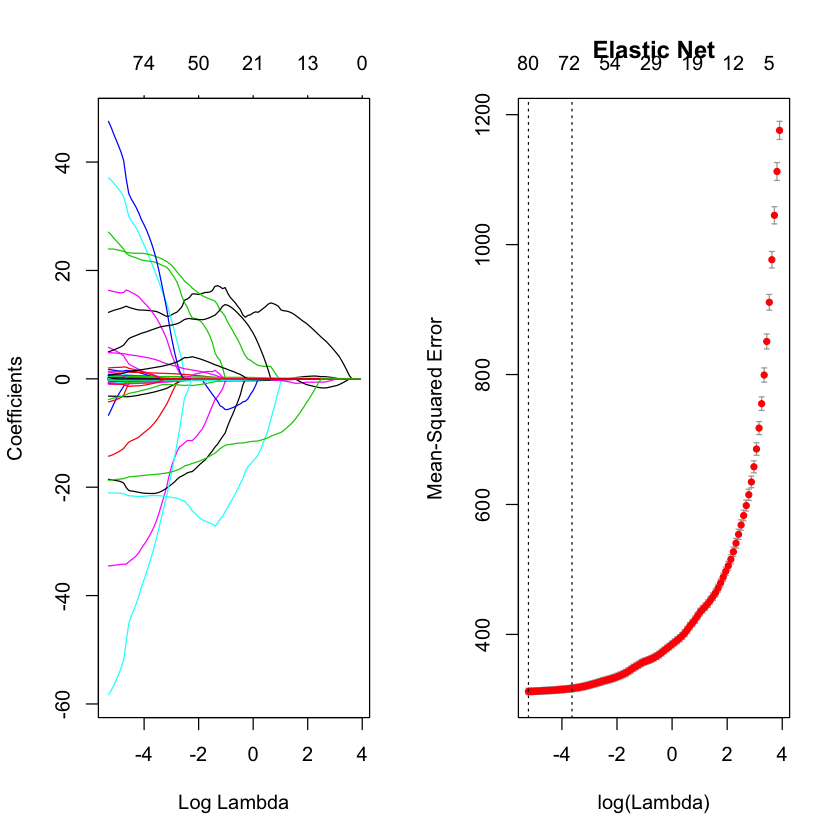

In [41]:
# Plot solution paths:
par(mfrow=c(1,2))
plot(fit.elnet,xvar="lambda")
plot(fit.elnet.cv, main="Elastic Net")

In [42]:
# making predictions using fitted model above
test_pred <- predict(fit.elnet.cv, s=fit.elnet.cv$lambda.1se, newx=as.matrix(test.data))
# Checking MSE
mse_elnet <- sqrt(mean((test.label - test_pred)^2))
print(paste('RMSE for Elastic Net:',mse_elnet))

# Checking R-Squared Value
rsq_elnet <- cor(test.label, test_pred)^2
print(paste('R-Squared for Elastic Net:',rsq_elnet))

[1] "RMSE for Elastic Net: 17.8867776130901"
[1] "R-Squared for Elastic Net: 0.725616277750196"


In [43]:
data.frame(predict(fit.elnet.cv, s = fit.elnet.cv$lambda.1se, type = "coefficients")[1:82,]) -> features.elnet
names(features.elnet) <- 'weight'
Features <- row.names(features.elnet)
row.names(features.elnet) <- 1:nrow(features.elnet)
features.elnet<-cbind(Features,features.elnet)
# Check the features with zero weights
features.elnet[(abs(features.elnet$weight)< 0.05),]

#storing values 
model_comp[2,] <- c('Elastic Net', round(rsq_elnet,3),round(mse_elnet,3),nrow(features.elnet[(abs(features.elnet$weight)!=0),])-1)

,Features,weight
5,gmean_atomic_mass,-4.972665e-03
6,wtd_gmean_atomic_mass,-6.368910e-03
10,wtd_range_atomic_mass,0.000000e+00
13,mean_fie,5.294658e-03
14,wtd_mean_fie,1.532681e-02
15,gmean_fie,0.000000e+00
16,wtd_gmean_fie,0.000000e+00
17,entropy_fie,0.000000e+00
20,wtd_range_fie,1.413614e-02
22,wtd_std_fie,-2.553024e-02


Parameters for **24 features** are shrinked very close to zero. Moreover, 7 features has been completely removed, i.e.`wtd_gmean_atomic_mass`,`wtd_range_atomic_mass`,`gmean_fie`,`wtd_gmean_fie`,`entropy_fie`,`entropy_atomic_radius`, and `wtd_mean_Valence`.

#### Lasso

Now, we will look at the performace of Lasso Regression.

In [44]:
# Fitting Lasso regression to the data
fit.lasso <- glmnet(as.matrix(train.data), as.matrix(train.label), family="gaussian", alpha=1)
fit.lasso.cv <- cv.glmnet(as.matrix(train.data), as.matrix(train.label), type.measure="mse", alpha=1,
                          family="gaussian")

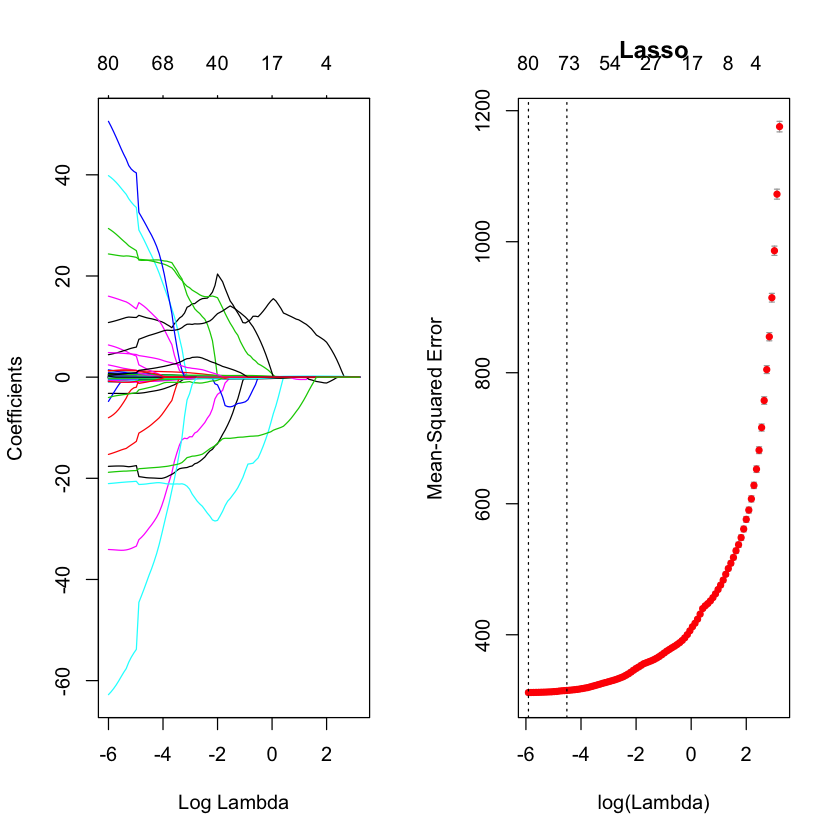

In [45]:
# Plot solution paths:
par(mfrow=c(1,2))
plot(fit.lasso,xvar="lambda")
plot(fit.lasso.cv, main="Lasso")

We will use`lambda.1.se` to get the parsimonious model, since 'lambda.min' retruns the lambda with least RMSE, achieved on the expense of adding more features to our model

In [46]:
test_pred <- predict(fit.lasso.cv, s=fit.lasso.cv$lambda.1se, newx=as.matrix(test.data))

# Checking MSE
mse_lasso <- sqrt(mean((test.label - test_pred)^2))
print(paste('RMSE for Lasso:',mse_lasso))

# Checking R-Squared Value
rsq_lasso <- cor(test.label, test_pred)^2
print(paste('R-Squared for Lasso:',rsq_lasso))

[1] "RMSE for Lasso: 17.8312560227451"
[1] "R-Squared for Lasso: 0.727342310788728"


In [47]:
data.frame(predict(fit.lasso.cv, s = fit.lasso.cv$lambda.1se, type = "coefficients")[1:82,]) -> features.lasso
names(features.lasso) <- 'weight'
Features <- row.names(features.lasso)
row.names(features.lasso) <- 1:nrow(features.lasso)
features.lasso<-cbind(Features,features.lasso)
# Check the features with zero weights
features.lasso[(abs(features.lasso$weight)< 0.05),]

#storing values 
model_comp[3,] <- c('Lasso', round(rsq_lasso,3),round(mse_lasso,3),nrow(features.lasso[(abs(features.lasso$weight)!=0),])-1)

# storing important features for Lasso
lasso_model_features <- features.lasso[(abs(features.lasso$weight)!=0),'Features'][-1]


,Features,weight
5,gmean_atomic_mass,-2.046120e-02
6,wtd_gmean_atomic_mass,0.000000e+00
10,wtd_range_atomic_mass,0.000000e+00
13,mean_fie,2.305641e-03
14,wtd_mean_fie,1.810265e-02
15,gmean_fie,0.000000e+00
16,wtd_gmean_fie,0.000000e+00
17,entropy_fie,0.000000e+00
20,wtd_range_fie,1.481348e-02
22,wtd_std_fie,-2.416209e-02


Parameters for **25 features** are shrinked very close to zero. Moreover, 9 features has been completely removed, i.e. `wtd_gmean_atomic_mass`,`wtd_range_atomic_mass`,`gmean_fie`,`wtd_gmean_fie`,`entropy_fie`,`entropy_atomic_radius`,`wtd_gmean_FusionHeat`,`mean_ThermalConductivity`, and `wtd_mean_Valence`.

### XGBoost Model

XGBoost has recently been popularly used around the world, to obtain high accuracy models. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Let's fit it to our dataset and check it's performance.

In [48]:
# Setting defaullt parameters
params <- list(eta=0.3, gamma=0, max_depth=6, min_child_weight=1, subsample=1, colsample_bytree=1)

In [49]:
 # Training the model using default parameters and more iterations
fit.XGB <- xgb.train(params = params,
                        data = xgb.DMatrix(data = as.matrix(train.data), label = as.matrix(train.label)),
                        nrounds = 3000,
                        nfold = 10, 
                        showsd = T, 
                        stratified = T,
                        print_every_n = 10,
                        early_stopping_rounds = 100,
                        watchlist = list(test = xgb.DMatrix(data = as.matrix(test.data),label = as.matrix(test.label))))

[1]	test-rmse:35.607552 
Will train until test_rmse hasn't improved in 100 rounds.

[11]	test-rmse:11.639416 
[21]	test-rmse:10.880176 
[31]	test-rmse:10.629022 
[41]	test-rmse:10.420289 
[51]	test-rmse:10.315037 
[61]	test-rmse:10.236148 
[71]	test-rmse:10.193866 
[81]	test-rmse:10.125165 
[91]	test-rmse:10.098318 
[101]	test-rmse:10.082262 
[111]	test-rmse:10.068814 
[121]	test-rmse:10.054916 
[131]	test-rmse:10.048759 
[141]	test-rmse:10.042699 
[151]	test-rmse:10.027145 
[161]	test-rmse:10.037346 
[171]	test-rmse:10.030608 
[181]	test-rmse:10.023036 
[191]	test-rmse:10.023011 
[201]	test-rmse:10.019464 
[211]	test-rmse:10.014511 
[221]	test-rmse:10.021206 
[231]	test-rmse:10.016566 
[241]	test-rmse:10.019551 
[251]	test-rmse:10.029482 
[261]	test-rmse:10.035264 
[271]	test-rmse:10.043022 
[281]	test-rmse:10.041998 
[291]	test-rmse:10.044185 
[301]	test-rmse:10.048757 
[311]	test-rmse:10.050773 
Stopping. Best iteration:
[212]	test-rmse:10.013698



Let's look at then change in RMSE values with each iteration, and top 10 features given by XGBoost model based on information gain criteria.

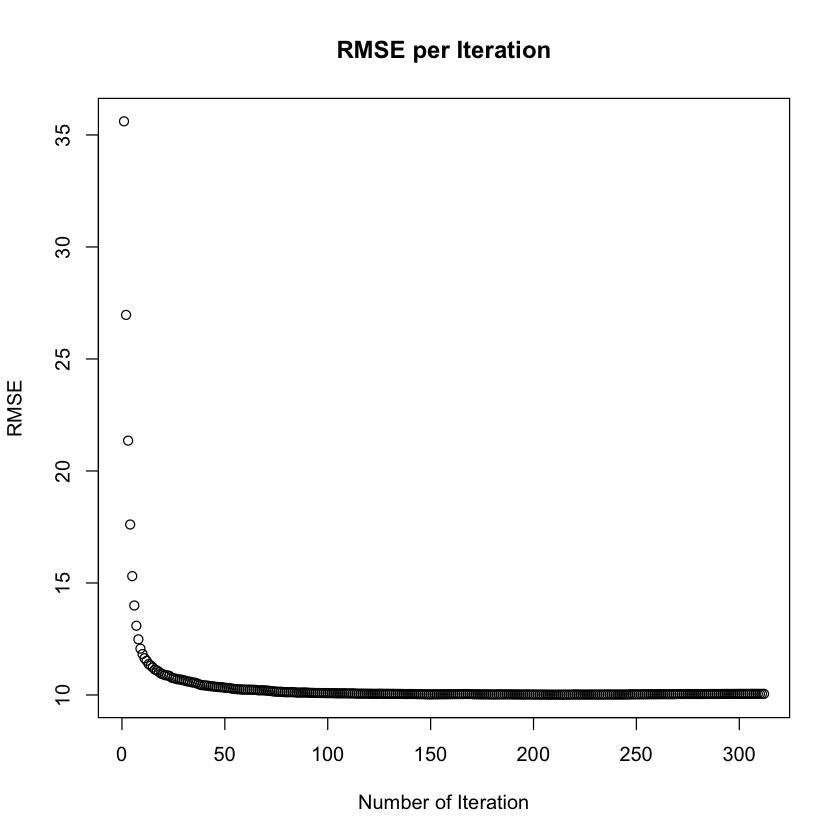

In [50]:
# Training and test error plots
XGB.log <- data.frame(fit.XGB$evaluation_log)
plot(XGB.log$iter, XGB.log$test_rmse, xlab = 'Number of Iteration', ylab = 'RMSE', main = 'RMSE per Iteration')

In [51]:
# Top 20 Feature Importance
important <- xgb.importance(colnames(train.data), model = fit.XGB)[1:20,]
XGboost_features <- xgb.importance(colnames(train.data), model = fit.XGB)[1:20,'Feature'] # storing those feature
print(important)

                            Feature        Gain       Cover   Frequency
 1:       range_ThermalConductivity 0.530858650 0.003402466 0.001721170
 2:   wtd_gmean_ThermalConductivity 0.111563588 0.010690532 0.012572027
 3:             range_atomic_radius 0.022404007 0.002807958 0.002694006
 4:               wtd_gmean_Valence 0.022032106 0.019299672 0.009952855
 5:                     std_Density 0.020389413 0.006754594 0.006136347
 6:    wtd_mean_ThermalConductivity 0.019185678 0.025419760 0.015864701
 7:                 std_atomic_mass 0.017348990 0.005773859 0.006959515
 8: wtd_entropy_ThermalConductivity 0.015958994 0.025003159 0.021701714
 9:        wtd_std_ElectronAffinity 0.015077088 0.020207198 0.015640201
10:                wtd_mean_Valence 0.013556121 0.019224560 0.012497194
11:     wtd_std_ThermalConductivity 0.013329777 0.046433950 0.025593055
12:      wtd_gmean_ElectronAffinity 0.010119655 0.023122366 0.014293198
13:                    mean_Density 0.008170929 0.005260028 0.00

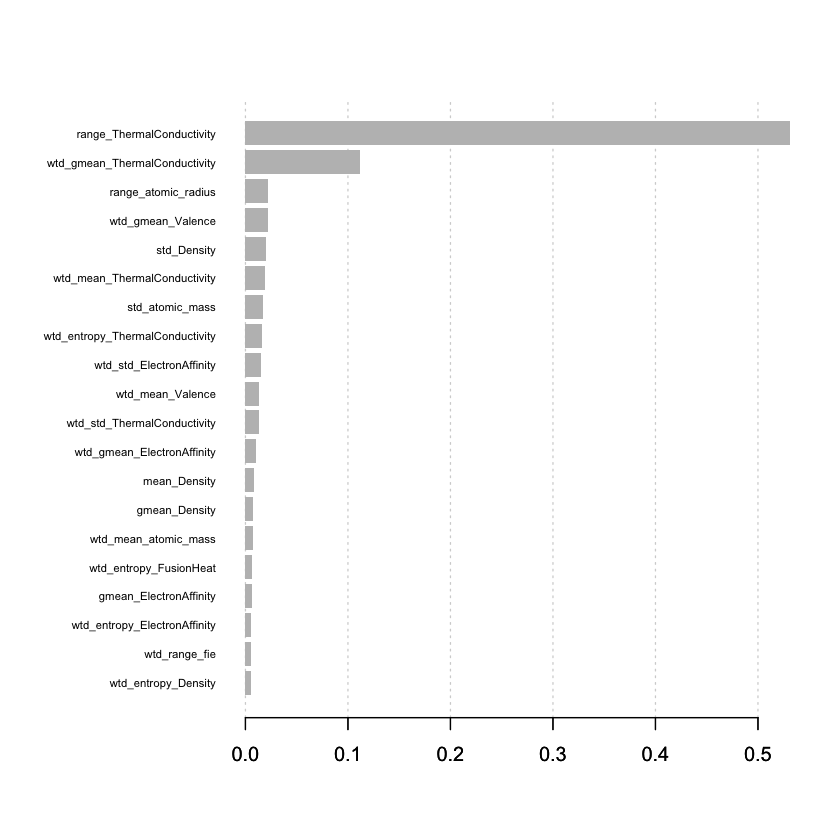

In [52]:
# Understanding importance with a plot
xgb.plot.importance(important)

`range_ThermalConductivity` seems to be the most important feature selected by the XGBoost algorithm used. Moreover `wtd_gmean_ThermalConductivity` also seems to be quite important compared to rest of the top 18 features.
Now, we will evaluate the performance of XGboost model on test set.

In [53]:
# Test the model on test data
test_xgbDMatrix <- xgb.DMatrix(data = as.matrix(test.data), label = test.label)
test_pred <- predict(fit.XGB, newdata = test_xgbDMatrix)

# Minimum RMSE
rmse_XGB <- min(XGB.log$test_rmse)
print(paste('Lowest RMSE with XGBoost :',rmse_XGB))

# Checking R-Squared Value
rsq_XGB <- cor(test.label, test_pred)^2
print(paste('R-Squared for XGB :',rsq_XGB))

# Storing values 
model_comp[4,] <- c('XGBoost', round(rsq_XGB,3),round(rmse_XGB,3),fit.XGB$nfeatures)


[1] "Lowest RMSE with XGBoost : 10.013698"
[1] "R-Squared for XGB : 0.91419587337505"


Highly accurate predictions with R-squared value of whopping `0.91` is obtained!

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In [54]:
model_comp

Model,R.Squared,R.M.S.E,Features
Linear model + CFS + MRMR,0.677,19.397,28
Elastic Net,0.726,17.887,71
Lasso,0.727,17.831,74
XGBoost,0.914,10.014,81


It is observable that `XGBoost` model returns the best fit (R-Squared of 0.91) and least errors (R.M.S.E - 10.01), but a major drawback is high number of features. This makes the model highly complex and difficult to explain. On the lower end of the scale of fit and error is `Linear model with C.F.S and M.R.M.R features (LMCM)` with the R-Squared of 0.68 and RMSE of 19.397. However, a data scientist may argue it's difference with XGBoost model is **compensated** by the vast difference in number of features. i.e. 81-28=53 features. 

Linear regression with Regularization, namely, `Elastic Net` and `Lasso`, are in middle of the aforementioned models, both, performance and complexity wise. They both have similar R-Squared on test set, i.e. 0.72, and Elastic Net performing slightly better in terms of RMSE. The main difference between these two lies between the number of features, where `Lasso` model has 8 lesser number of features than `Elastic Net`. Thus, it can be concluded that `Lasso` returns **overall better performance** on the superconductor dataset than `Elastic Net`.

The difference among `LMCM` and Regularization methods, isn't very significant in terms of fit anf RMSE. However, This minute difference is overshadowed by the high difference in the number of features.

Let's check the residuals of the linear model created at Model-1. 

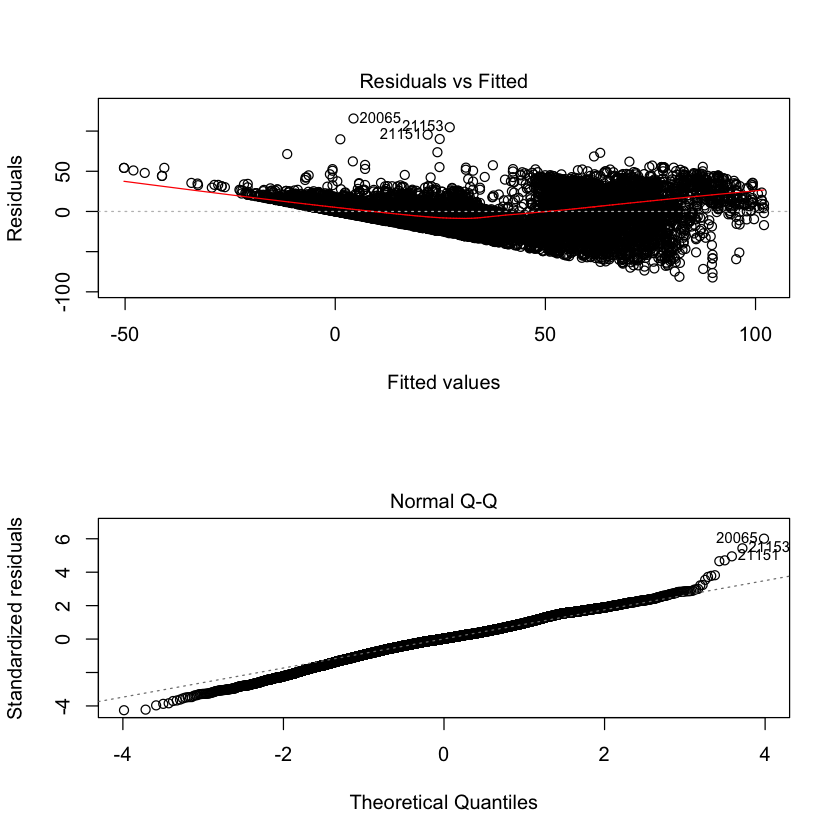

In [55]:
par(mfcol=c(2,1))
plot(fit.step,which=1)
plot(fit.step,which=2)

The diagnostic plots show residuals in four different ways.

1. The **residual vs fitted plot**: We can identify some non-linear trends in the plot, which indicates some information is yet to be captured by our model.
2. The normal **Q-Q plot**: We can observe that most of residuals are parrallel and lined up on the dashed line, which indicates the residuals are normally distributed.

Here, we can conclude that though model is explainable with less number of features and the normally distributed residuals, model still has some more information to extract out of the dataset, confirmed by the non-linear trend observed in residual vs fitted plot.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

Let's look at the common features selected by the all three models.

In [56]:
# Priniting important common features in all models
as.matrix(intersect(intersect(model_1_features,lasso_model_features),lasso_model_features))

wtd_gmean_atomic_radius
mean_ElectronAffinity
std_atomic_radius
range_Valence
mean_atomic_mass
wtd_gmean_Density
entropy_atomic_mass
wtd_entropy_ElectronAffinity
std_Density
std_Valence
gmean_atomic_radius


Following are the most important features selected by all three models:

* **Thermal Conductivity** : 'wtd_gmean_ThermalConductivity', 'wtd_range_ThermalConductivity', 'mean_ThermalConductivity','wtd_std_ThermalConductivity', 'range_ThermalConductivity'
* **Atomic Mass** : 'mean_atomic_mass', 'entropy_atomic_mass', 'range_atomic_mass', 'wtd_entropy_atomic_mass'
* **Density** : 'wtd_gmean_Density', 'std_Density', 'range_atomic_radius', 'gmean_Density', 'entropy_Density'
* **Atomic Radius** : 'wtd_gmean_atomic_radius', 'std_atomic_radius', 'gmean_atomic_radius'
* **Valence** : 'range_Valence', 'std_Valence', 'wtd_entropy_Valence'
* **Electron Affinity** : 'mean_ElectronAffinity', 'wtd_entropy_ElectronAffinity' ,'wtd_range_ElectronAffinity', 'wtd_gmean_ElectronAffinity'
* **Fusion Heat** : 'wtd_entropy_FusionHeat', 'wtd_range_FusionHeat'

It seems that `Thermal Conductivity` is the most important property, since it has most number of descriptions selected as features in our models, followed by `Density`, `Atomic Radius` and `Atomic Mass`.
`First Ionization Energy` seems to have least effect on superconductivity, since no model selected as an important feature.

Upon, researching more about `Superconductivity`, it can be confirmed that `Thermal Conductivity` has high positive correlation with superconductivity, since they both measure similar property of any element, i.e., conducive characteristic of element.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

In the industry of Data Science, where 'No model is correct, and some are useful', the choice of model is subjective and dynamic to business needs. It can be left upon Data Scientist to choose which 'model is useful' for requirements of the Data Science project. Both, a non-parasimonious model with high accuracy , and a parsimonious model with releatively lower accuracy are developed. First one can be used, if the objective of the project is `Predictive Analysis`, where only getting highly accurate results matters, and latter can be used if the objective `Descriptive Analysis`, where power of explanations matters.

In this project, we built various models with ranging accuracy on the test set. `XGBoost` model was found to be performing the best on the 'Superconductor' data set, at the expense of high number of features. However, the most parsimonious linear model developed is built by using combination of, `MRMR Feature selection`, `Correlation based Feature Selection`, and `Hybrid Information Gain Selction` techniques.

From our analysis, it can be said that `Thermal Conductivity` is the most important property of elements, followed by `Density`, `Atomic Radius` and `Atomic Mass`. `First Ionization Energy` appears to have the least or no effect. Physicists can use the results from our analysis, and identify factors affecting superconductivity, and probably find a way to quantitaively measure this property down the road!

## 7. References <a class="anchor" id="sec_7"></a>

* Beginners Tutorial on XGBoost and Parameter Tuning in R Tutorials & Notes | Machine Learning | HackerEarth. (2019). Retrieved 15 September 2019, from https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/
* MRMR function | R Documentation. (2019). Retrieved 15 September 2019, from https://www.rdocumentation.org/packages/praznik/versions/6.0.0/topics/MRMR
* R, M. (2019). Multicollinearity Essentials and VIF in R - Articles - STHDA. Retrieved 15 September 2019, from http://www.sthda.com/english/articles/39-regression-model-diagnostics/160-multicollinearity-essentials-and-vif-in-r/
* Haqqani, M. (2019). FIT5149 Tutorial Week 1-6 [Ebook]. Grayming Liu.